In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore") #경고 표시 제거는 일시적으로만 하자... 중요한 내용일수도

import matplotlib.font_manager as fm #한글 안깨지게
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl # - 표시 정상적으로 되도록
mpl.rcParams["axes.unicode_minus"]=False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from urllib.parse import quote
from bs4 import BeautifulSoup
import requests


In [7]:
su=pd.read_csv("data/미니프로젝트/2018-2019 서울 강수량2.csv")
gg=pd.read_csv("data/미니프로젝트/2018-2019-경기도-시별-강수량-데이터7.csv")
ic=pd.read_csv("data/미니프로젝트/인천_18_19.csv")

In [8]:
su["지점명"]="서울"
su.rename(columns={"강수량":"강수량(mm)","1시간최다강수량":"1시간최다강수량(mm)"}, inplace=True)
su

,날짜,강수량(mm),1시간최다강수량(mm),지점명
0,2018-01-01,0.000,0.00,서울
1,2018-01-02,0.000,0.00,서울
2,2018-01-03,0.000,0.00,서울
3,2018-01-04,0.000,0.00,서울
4,2018-01-05,0.000,0.00,서울
...,...,...,...,...
725,2019-12-27,0.000,0.00,서울
726,2019-12-28,0.000,0.00,서울
727,2019-12-29,0.906,0.56,서울
728,2019-12-30,0.226,0.32,서울


In [9]:
gg.rename(columns={"지점명3":"지점명", "일시":"날짜"}, inplace=True)
gg

,지점명,날짜,강수량(mm),1시간최다강수량(mm)
0,고양시,2018-01-01,0.0,0.0
1,고양시,2018-01-02,0.0,0.0
2,고양시,2018-01-03,0.0,0.0
3,고양시,2018-01-04,0.0,0.0
4,고양시,2018-01-05,0.0,0.0
...,...,...,...,...
19705,화성시,2019-12-27,0.0,0.0
19706,화성시,2019-12-28,0.0,0.0
19707,화성시,2019-12-29,0.5,0.5
19708,화성시,2019-12-30,0.5,0.5


In [10]:
def si(x):
    return x[:-1]

In [11]:
gg["지점명"]=gg["지점명"].apply(si)

In [12]:
gg["지점명"].unique()

array(['고양', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천', '성남',
       '수원', '시흥', '안산', '안성', '안양', '양주', '여주', '오산', '용인', '의왕', '의정부',
       '이천', '파주', '평택', '포천', '화성'], dtype=object)

In [13]:
ic.drop("Unnamed: 0", axis=1, inplace=True)
ic.rename(columns={"일시":"날짜"}, inplace=True)
ic

,날짜,지점명,강수량(mm),1시간최다강수량(mm)
0,2018-01-01,인천,0.00,0.00
1,2018-01-02,인천,0.00,0.00
2,2018-01-03,인천,0.00,0.00
3,2018-01-04,인천,0.00,0.00
4,2018-01-05,인천,0.00,0.00
...,...,...,...,...
725,2019-12-27,인천,0.00,0.00
726,2019-12-28,인천,0.03,0.03
727,2019-12-29,인천,1.00,0.58
728,2019-12-30,인천,0.18,0.24


In [14]:
rain=pd.concat([su, gg])

In [15]:
rain=pd.concat([rain,ic])

In [16]:
rain.to_csv("data/미니프로젝트/서울,인천,경기도 강수량 데이터(경기도 하남시 제외)2.csv", sep=",")

In [17]:
rain=pd.read_csv("data/미니프로젝트/서울,인천,경기도 강수량 데이터(경기도 하남시 제외)2.csv", index_col=0)


In [18]:
accident=pd.read_csv("data/미니프로젝트/18-19 교통사고.csv", index_col=0)

In [19]:
rain

,날짜,강수량(mm),1시간최다강수량(mm),지점명
0,2018-01-01,0.00,0.00,서울
1,2018-01-02,0.00,0.00,서울
2,2018-01-03,0.00,0.00,서울
3,2018-01-04,0.00,0.00,서울
4,2018-01-05,0.00,0.00,서울
...,...,...,...,...
725,2019-12-27,0.00,0.00,인천
726,2019-12-28,0.03,0.03,인천
727,2019-12-29,1.00,0.58,인천
728,2019-12-30,0.18,0.24,인천


In [20]:
accident=accident.reset_index()

In [21]:
accident["시군구"].unique()

array(['서울', '인천', '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시',
       '남양주시', '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시',
       '양주시', '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시',
       '파주시', '평택시', '포천시', '하남시', '화성시'], dtype=object)

In [22]:
idx1=accident[accident["시군구"]=="가평군"].index
idx2=accident[accident["시군구"]=="양평군"].index
idx3=accident[accident["시군구"]=="연천군"].index
idx4=accident[accident["시군구"]=="하남시"].index
idx=list(idx1)+list(idx2)+list(idx3)+list(idx4)
accident.drop(idx, inplace=True)

In [23]:
def sigungu(x):
    if "시" in x:
        return x[:-1]
    else:
        return x

In [24]:
accident["시군구"]=accident["시군구"].apply(sigungu)

In [25]:
accident["시군구"].unique()

array(['서울', '인천', '고양', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천',
       '부천', '성남', '수원', '시흥', '안산', '안성', '안양', '양주', '여주', '오산', '용인',
       '의왕', '의정부', '이천', '파주', '평택', '포천', '화성'], dtype=object)

In [26]:
accident

,index,날짜,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,시군구
0,0,2018-01-01,61,7,32,100,67,1,서울
1,1,2018-01-10,150,12,36,198,146,2,서울
2,2,2018-01-11,125,9,48,182,134,0,서울
3,3,2018-01-12,156,24,46,226,157,1,서울
4,4,2018-01-13,149,23,36,208,133,1,서울
...,...,...,...,...,...,...,...,...,...
24085,22625,2019-12-05,12,1,5,18,13,0,화성
24086,22626,2019-12-06,14,0,4,18,11,0,화성
24087,22627,2019-12-07,12,0,1,13,8,0,화성
24088,22628,2019-12-08,2,2,4,8,5,0,화성


In [27]:
a=accident["시군구"].unique()
b=rain["지점명"].unique()

In [28]:
a.sort()
b.sort()
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [29]:
accident.rename(columns={'시군구':"지점명"}, inplace=True)
accident

,index,날짜,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,지점명
0,0,2018-01-01,61,7,32,100,67,1,서울
1,1,2018-01-10,150,12,36,198,146,2,서울
2,2,2018-01-11,125,9,48,182,134,0,서울
3,3,2018-01-12,156,24,46,226,157,1,서울
4,4,2018-01-13,149,23,36,208,133,1,서울
...,...,...,...,...,...,...,...,...,...
24085,22625,2019-12-05,12,1,5,18,13,0,화성
24086,22626,2019-12-06,14,0,4,18,11,0,화성
24087,22627,2019-12-07,12,0,1,13,8,0,화성
24088,22628,2019-12-08,2,2,4,8,5,0,화성


In [30]:
rain_accident=pd.merge(rain, accident, how="outer", on=["지점명","날짜"])

In [31]:
rain_accident=rain_accident.fillna(0)

In [32]:
rain_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21170 entries, 0 to 21169
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            21170 non-null  object 
 1   강수량(mm)       21170 non-null  float64
 2   1시간최다강수량(mm)  21170 non-null  float64
 3   지점명           21170 non-null  object 
 4   index         21170 non-null  int64  
 5   경상자수          21170 non-null  int64  
 6   부상신고자수        21170 non-null  int64  
 7   중상자수          21170 non-null  int64  
 8   부상자수          21170 non-null  int64  
 9   사고건수          21170 non-null  int64  
 10  사망자수          21170 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.9+ MB


In [33]:
rain_accident.drop("index", axis=1, inplace=True)

In [34]:
rain_accident.to_csv("data/미니프로젝트/2018-2019 서울,인천,경기 교통사고 및 강수량 데이터2.csv", sep=",", encoding="utf-8-sig")

In [2]:
rain_accident=pd.read_csv("data/미니프로젝트/2018-2019 서울,인천,경기 교통사고 및 강수량 데이터2.csv", index_col=0)
rain_accident

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
0,2018-01-01,0.00,0.00,서울,61,7,32,100,67,1
1,2018-01-02,0.00,0.00,서울,58,4,29,91,78,0
2,2018-01-03,0.00,0.00,서울,59,11,28,98,72,2
3,2018-01-04,0.00,0.00,서울,65,4,27,96,81,3
4,2018-01-05,0.00,0.00,서울,82,16,35,133,94,1
...,...,...,...,...,...,...,...,...,...,...
21165,2019-12-27,0.00,0.00,인천,17,2,6,25,22,0
21166,2019-12-28,0.03,0.03,인천,25,4,6,35,24,0
21167,2019-12-29,1.00,0.58,인천,13,1,4,18,15,0
21168,2019-12-30,0.18,0.24,인천,17,2,5,24,20,0


In [4]:
rain_accident.corr()

,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
강수량(mm),1.000000,0.882488,0.005751,-0.000078,-0.000636,0.003965,0.004392,-0.002757
1시간최다강수량(mm),0.882488,1.000000,0.006446,-0.000299,-0.001569,0.004240,0.005474,-0.005717
경상자수,0.005751,0.006446,1.000000,0.823430,0.925539,0.994605,0.983769,0.377460
부상신고자수,-0.000078,-0.000299,0.823430,1.000000,0.784417,0.856401,0.838586,0.316831
중상자수,-0.000636,-0.001569,0.925539,0.784417,1.000000,0.953298,0.952516,0.375279
부상자수,0.003965,0.004240,0.994605,0.856401,0.953298,1.000000,0.990287,0.381547
사고건수,0.004392,0.005474,0.983769,0.838586,0.952516,0.990287,1.000000,0.391014
사망자수,-0.002757,-0.005717,0.377460,0.316831,0.375279,0.381547,0.391014,1.000000


In [5]:
rain_corr=rain_accident.corr(method="pearson")[["강수량(mm)","1시간최다강수량(mm)"]].iloc[2:8]

<AxesSubplot:xlabel='강수량(mm)', ylabel='사고건수'>

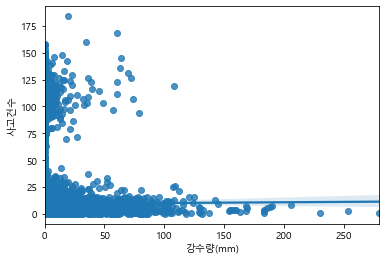

In [8]:
sns.regplot(x="강수량(mm)", y="사고건수", data=rain_accident)

In [34]:
a=rain_accident[rain_accident["지점명"]=="오산"]
a[a["사망자수"] > 0]

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,강수여부,폭우여부1,폭우여부2,폭우여부종합
13898,2018-01-29,0.0,0.0,오산,2,0,0,2,2,1,0.0,0,0,0
13924,2018-02-24,0.0,0.0,오산,2,1,2,5,2,1,0.0,0,0,0
13990,2018-05-01,0.0,0.0,오산,1,1,0,2,2,1,0.0,0,0,0
14057,2018-07-07,0.0,0.0,오산,1,0,1,2,2,1,0.0,0,0,0
14079,2018-07-29,0.0,0.0,오산,0,0,0,0,1,1,0.0,0,0,0
14105,2018-08-24,36.5,14.5,오산,1,0,2,3,3,1,1.0,0,0,0
14214,2018-12-11,0.0,0.0,오산,1,0,0,1,2,1,0.0,0,0,0
14215,2018-12-12,0.0,0.0,오산,6,0,0,6,6,1,0.0,0,0,0
14230,2018-12-27,0.0,0.0,오산,3,0,1,4,3,1,0.0,0,0,0
14232,2018-12-29,0.0,0.0,오산,1,0,1,2,2,1,0.0,0,0,0


In [8]:
rain_accident.corr()["1시간최다강수량(mm)"]

강수량(mm)         0.882488
1시간최다강수량(mm)    1.000000
경상자수            0.006446
부상신고자수         -0.000299
중상자수           -0.001569
부상자수            0.004240
사고건수            0.005474
사망자수           -0.005717
Name: 1시간최다강수량(mm), dtype: float64

In [9]:
rain_accident["강수여부"]=rain_accident["강수량(mm)"]


In [10]:
def rain(x):
    if x==0:
        return x
    else:
        return 1

rain_accident["강수여부"]=rain_accident["강수여부"].apply(rain)

In [11]:
rain_accident.corr()["강수여부"].iloc[2:8]

경상자수      0.053742
부상신고자수    0.040922
중상자수      0.043657
부상자수      0.051820
사고건수      0.052085
사망자수      0.021766
Name: 강수여부, dtype: float64

In [12]:
rain_accident["폭우여부1"]=rain_accident["강수량(mm)"]
rain_accident["폭우여부2"]=rain_accident["1시간최다강수량(mm)"]

In [13]:
def dailypoku(x):
    if x>=80:
        return 1
    else:
        return 0

def hourlypoku(x):
    if x>=30:
        return 1
    else:
        return 0

In [14]:
rain_accident["폭우여부1"]=rain_accident["폭우여부1"].apply(dailypoku)
rain_accident["폭우여부2"]=rain_accident["폭우여부2"].apply(hourlypoku)

In [15]:
rain_accident["폭우여부종합"]=rain_accident["폭우여부1"]+rain_accident["폭우여부2"]

In [16]:
rain_accident.corr()["폭우여부종합"].iloc[2:8]

경상자수     -0.009638
부상신고자수   -0.010260
중상자수     -0.013330
부상자수     -0.010760
사고건수     -0.010704
사망자수     -0.012808
Name: 폭우여부종합, dtype: float64

In [17]:
rain_accident.corr()["폭우여부종합"]

강수량(mm)         0.708962
1시간최다강수량(mm)    0.691079
경상자수           -0.009638
부상신고자수         -0.010260
중상자수           -0.013330
부상자수           -0.010760
사고건수           -0.010704
사망자수           -0.012808
강수여부            0.149908
폭우여부1           0.885493
폭우여부2           0.863838
폭우여부종합          1.000000
Name: 폭우여부종합, dtype: float64

<AxesSubplot:xlabel='폭우여부종합', ylabel='사고건수'>

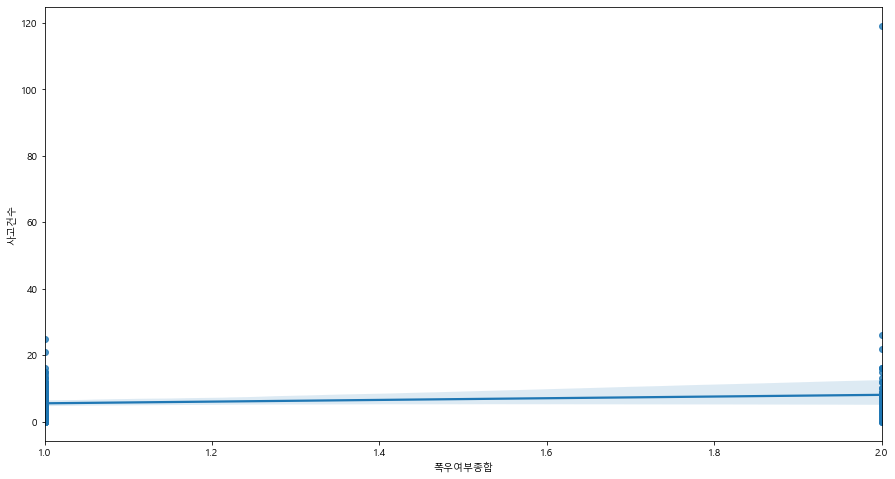

In [39]:
plt.figure(figsize=(15,8))
sns.regplot(x="폭우여부종합", y="사고건수", data=rain_accident[rain_accident["폭우여부종합"]>0])

In [38]:
rain_accident[rain_accident["폭우여부종합"]>0].corr()["폭우여부종합"]

강수량(mm)         0.617741
1시간최다강수량(mm)    0.632326
경상자수            0.131230
부상신고자수         -0.048695
중상자수            0.026387
부상자수            0.101110
사고건수            0.121138
사망자수           -0.099452
강수여부                 NaN
폭우여부1           0.450872
폭우여부2           0.582471
폭우여부종합          1.000000
Name: 폭우여부종합, dtype: float64

In [34]:
print(rain_accident.corr()["강수량(mm)"][2:8])


경상자수      0.005751
부상신고자수   -0.000078
중상자수     -0.000636
부상자수      0.003965
사고건수      0.004392
사망자수     -0.002757
Name: 강수량(mm), dtype: float64


In [43]:
city=[]
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]

for i in rain_accident["지점명"].unique():
    ac=rain_accident[rain_accident["지점명"]==i]
    #print(i,"시의 강수량/교통사고 상관계수")
    #print(a.corr()["강수량(mm)"][2:8])
    city.append(i)
    a.append(ac.corr()["강수량(mm)"][2])
    b.append(ac.corr()["강수량(mm)"][3])
    c.append(ac.corr()["강수량(mm)"][4])
    d.append(ac.corr()["강수량(mm)"][5])
    e.append(ac.corr()["강수량(mm)"][6])
    f.append(ac.corr()["강수량(mm)"][7])         

In [40]:
city=[]
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]

for i in rain_accident["지점명"].unique():
    ac=rain_accident[rain_accident["지점명"]==i]
    #print(i,"시의 강수량/교통사고 상관계수")
    #print(a.corr()["강수량(mm)"][2:8])
    city.append(i)
    a.append(ac.corr()["폭우여부종합"][2])
    b.append(ac.corr()["폭우여부종합"][3])
    c.append(ac.corr()["폭우여부종합"][4])
    d.append(ac.corr()["폭우여부종합"][5])
    e.append(ac.corr()["폭우여부종합"][6])
    f.append(ac.corr()["폭우여부종합"][7])         

In [44]:
corr_by_cities=pd.DataFrame({"도시":city, "사고건수":e, "부상자수":d, "부상신고자수":b, "경상자수":a, "중상자수":c, "사망자수":f})
corr_by_cities.sort_values(by="부상신고자수", ascending=False)

,도시,사고건수,부상자수,부상신고자수,경상자수,중상자수,사망자수
23,이천,0.076528,0.086598,0.091060,0.065893,4.079900e-02,0.013299
20,용인,0.060834,0.021552,0.054088,0.010454,-1.072731e-02,-0.037704
8,남양주,0.006918,0.019197,0.040334,0.012182,-5.849240e-03,-0.036579
7,김포,0.015958,-0.009895,0.031680,-0.019270,-2.690824e-03,-0.050081
24,파주,0.038598,0.042575,0.031574,0.027868,3.782684e-02,0.019406
19,오산,0.065411,0.086160,0.031076,0.050258,1.153752e-01,-0.011051
0,서울,0.113468,0.118438,0.027449,0.132881,4.905957e-02,-0.003314
17,양주,0.045578,0.063670,0.022932,0.059566,2.832069e-02,-0.030393
18,여주,0.019340,0.018705,0.017575,0.023381,-1.187529e-02,-0.043156
13,시흥,0.062737,0.047331,0.016255,0.045921,2.011895e-02,-0.008361


In [45]:
for i in corr_by_cities.columns[1:7]:
    city1=pd.DataFrame(corr_by_cities["도시"][corr_by_cities[i]==corr_by_cities[i].sort_values(ascending=False).iloc[0]])
    city2=pd.DataFrame(corr_by_cities["도시"][corr_by_cities[i]==corr_by_cities[i].sort_values(ascending=False).iloc[-1]])
    #str(city1)[9:]
    print(i, "상관계수 최대치:", str(city1)[-3:], corr_by_cities[i].sort_values(ascending=False).iloc[0])
    print(i, "상관계수 최소치:", str(city2)[-3:], corr_by_cities[i].sort_values(ascending=False).iloc[-1])
    print(i, "상관계수 최대/최소 지역 간 차이: ", corr_by_cities[i].sort_values(ascending=False).iloc[0]-corr_by_cities[i].sort_values(ascending=False).iloc[-1])
    print("-"*80)

사고건수 상관계수 최대치:  서울 0.11346785483375392
사고건수 상관계수 최소치:  광명 -0.03229137536007861
사고건수 상관계수 최대/최소 지역 간 차이:  0.14575923019383252
--------------------------------------------------------------------------------
부상자수 상관계수 최대치:  서울 0.1184380036642878
부상자수 상관계수 최소치: 의정부 -0.03668481894038783
부상자수 상관계수 최대/최소 지역 간 차이:  0.15512282260467564
--------------------------------------------------------------------------------
부상신고자수 상관계수 최대치:  이천 0.09105976929001734
부상신고자수 상관계수 최소치:  고양 -0.04714867953320016
부상신고자수 상관계수 최대/최소 지역 간 차이:  0.1382084488232175
--------------------------------------------------------------------------------
경상자수 상관계수 최대치:  서울 0.13288098936817078
경상자수 상관계수 최소치:  화성 -0.02704039949759474
경상자수 상관계수 최대/최소 지역 간 차이:  0.1599213888657655
--------------------------------------------------------------------------------
중상자수 상관계수 최대치:  오산 0.1153752232627542
중상자수 상관계수 최소치: 의정부 -0.06326901593082125
중상자수 상관계수 최대/최소 지역 간 차이:  0.17864423919357547
-------------------------------------------------

In [46]:
corr_by_cities.columns

Index(['도시', '사고건수', '부상자수', '부상신고자수', '경상자수', '중상자수', '사망자수'], dtype='object')

Text(0.5, 1.0, '도시별 강수량-사고건수 상관계수')

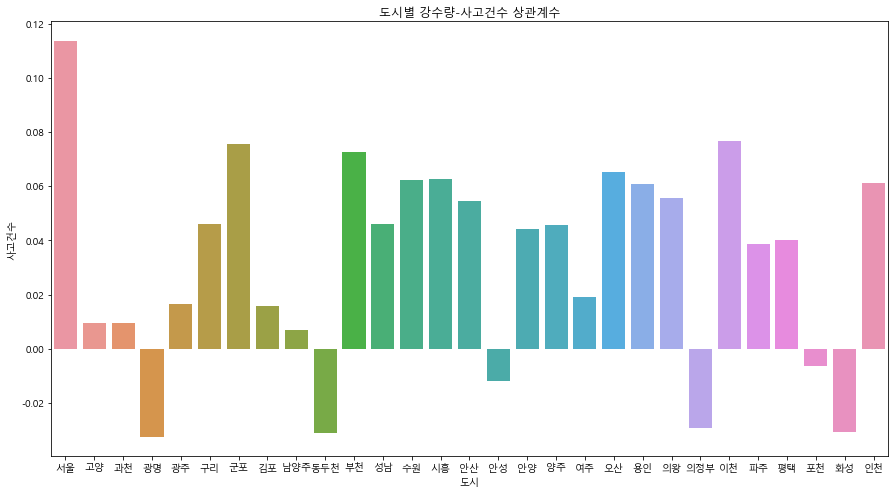

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x="도시", y="사고건수", data=corr_by_cities)
plt.title("도시별 강수량-사고건수 상관계수")

Text(0.5, 1.0, '도시별 강수량-부상자수 상관계수')

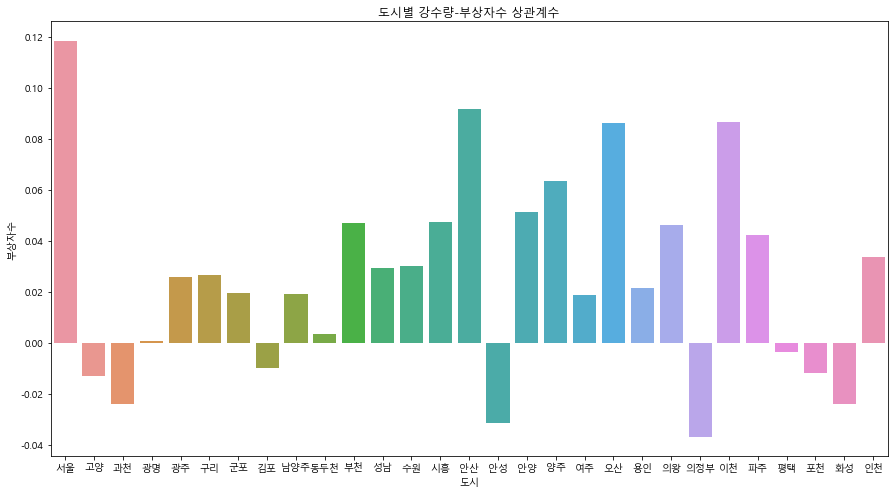

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x="도시", y="부상자수", data=corr_by_cities)
plt.title("도시별 강수량-부상자수 상관계수")

Text(0.5, 1.0, '도시별 강수량-중상자수 상관계수')

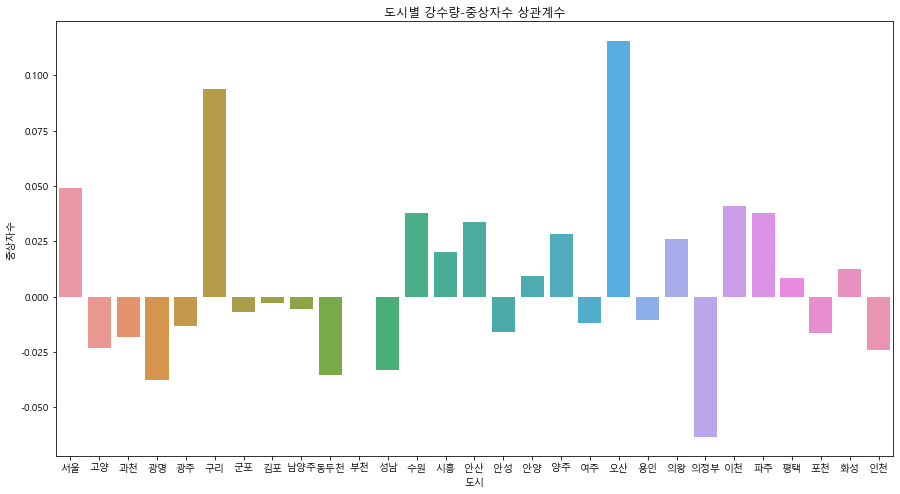

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x="도시", y="중상자수", data=corr_by_cities)
plt.title("도시별 강수량-중상자수 상관계수")

Text(0.5, 1.0, '도시별 강수량-사망자수 상관계수')

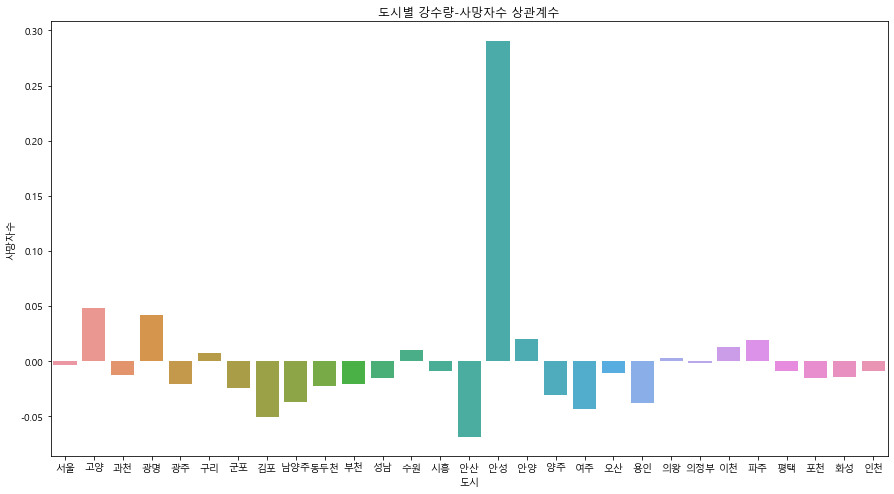

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(x="도시", y="사망자수", data=corr_by_cities)
plt.title("도시별 강수량-사망자수 상관계수")

In [165]:
accident=pd.read_excel("data/미니프로젝트/2014_19년 서울_경기 개별 교통사고 정보.xlsx")

In [166]:
accident["도로형태_대분류"].unique()

array(['단일로', '교차로', '기타/불명', '철길건널목', '기타', '불명'], dtype=object)

In [167]:
accident["노면상태"].unique()

array(['젖음/습기', '건조', '기타', '서리/결빙', '적설', '해빙', '침수'], dtype=object)

In [168]:
accident["기상상태"].unique()

array(['흐림', '맑음', '기타/불명', '눈', '비', '안개'], dtype=object)

In [169]:
accident.drop(["가해자법규위반","도로형태","노면상태_대분류","가해당사자종별","가해자성별","가해자연령","가해자신체상해정도","피해당사자종별","피해자성별","피해자연령","피해자신체상해정도","사고유형_대분류","사고유형_중분류"], axis=1, inplace=True)

In [170]:
accident["발생"]=1

In [171]:
pd.get_dummies(accident["도로형태_대분류"])

,교차로,기타,기타/불명,단일로,불명,철길건널목
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
550786,0,0,0,1,0,0
550787,1,0,0,0,0,0
550788,1,0,0,0,0,0
550789,0,0,0,1,0,0


In [172]:
pd.get_dummies(data = accident, columns = ['도로형태_대분류'], prefix = '도로형태').corr()

,발생일,사망자수,중상자수,경상자수,부상신고자수,발생,도로형태_교차로,도로형태_기타,도로형태_기타/불명,도로형태_단일로,도로형태_불명,도로형태_철길건널목
발생일,1.000000,-0.015075,-0.062474,0.025697,0.002846,NaN,0.036521,0.147928,-0.112618,-0.056420,0.014422,0.001535
사망자수,-0.015075,1.000000,-0.013851,-0.070509,-0.014191,NaN,-0.020526,-0.008144,-0.004393,0.024028,0.000371,-0.000289
중상자수,-0.062474,-0.013851,1.000000,-0.230234,-0.055888,NaN,0.013410,-0.016161,-0.002306,-0.007620,-0.002420,0.003098
경상자수,0.025697,-0.070509,-0.230234,1.000000,-0.036015,NaN,0.013448,-0.011122,-0.018589,-0.005326,-0.002188,0.000603
부상신고자수,0.002846,-0.014191,-0.055888,-0.036015,1.000000,NaN,-0.011728,-0.002024,0.002000,0.011846,-0.000462,-0.000730
발생,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
도로형태_교차로,0.036521,-0.020526,0.013410,0.013448,-0.011728,NaN,1.000000,-0.145507,-0.109842,-0.921923,-0.017594,-0.002428
도로형태_기타,0.147928,-0.008144,-0.016161,-0.011122,-0.002024,NaN,-0.145507,1.000000,-0.019693,-0.165283,-0.003154,-0.000435
도로형태_기타/불명,-0.112618,-0.004393,-0.002306,-0.018589,0.002000,NaN,-0.109842,-0.019693,1.000000,-0.124771,-0.002381,-0.000329
도로형태_단일로,-0.056420,0.024028,-0.007620,-0.005326,0.011846,NaN,-0.921923,-0.165283,-0.124771,1.000000,-0.019986,-0.002758


In [187]:
pd.get_dummies(data = accident, columns = ['노면상태'], prefix = '노면상태').corr()[["사망자수", "중상자수", "경상자수", "부상신고자수"]].loc[["노면상태_건조", "노면상태_기타", "노면상태_서리/결빙", "노면상태_적설", "노면상태_젖음/습기", "노면상태_해빙"]]

,사망자수,중상자수,경상자수,부상신고자수
노면상태_건조,-0.015620,-0.010407,-0.006501,0.000287
노면상태_기타,-0.000490,0.000852,-0.006335,-0.000311
노면상태_서리/결빙,0.003920,0.006189,0.012728,0.002281
노면상태_적설,-0.000938,-0.003135,0.008097,-0.000351
노면상태_젖음/습기,0.016804,0.010202,0.005145,-0.000743
노면상태_해빙,-0.000479,-0.001171,0.001467,0.001322


In [192]:
pd.get_dummies(data = accident, columns = ['기상상태'], prefix = '기상상태').corr()[["사망자수", "중상자수", "경상자수", "부상신고자수"]].iloc[6:]

,사망자수,중상자수,경상자수,부상신고자수
기상상태_기타/불명,-0.002642,-0.002284,-0.003970,-0.002641
기상상태_눈,0.000310,-0.002574,0.008745,0.000645
기상상태_맑음,-0.017761,-0.010895,-0.003416,0.001006
기상상태_비,0.008686,0.007950,0.006049,-0.002457
기상상태_안개,0.015206,0.004468,0.003137,0.001206
기상상태_흐림,0.017797,0.009705,-0.003937,0.002334


In [35]:
for i in accident["기상상태"].unique():
    a=accident[accident["기상상태"]==i]["발생"].sum()
    #print(i, a)
    b=accident[accident["기상상태"]==i]["사망자수"].sum()
    c=accident[accident["기상상태"]==i]["중상자수"].sum()
    d=accident[accident["기상상태"]==i]["경상자수"].sum()
    print(i, "사망율:", round(b/a*100, 2),"%", "중상율:", round(c/a*100, 2), "%", "경상율:", round(d/a*100, 2), "%")

흐림 사망율: 2.26 % 중상율: 36.31 % 경상율: 98.5 %
맑음 사망율: 1.14 % 중상율: 33.15 % 경상율: 100.6 %
기타/불명 사망율: 0.89 % 중상율: 31.95 % 경상율: 96.09 %
눈 사망율: 1.26 % 중상율: 31.33 % 경상율: 113.71 %
비 사망율: 1.6 % 중상율: 35.19 % 경상율: 103.33 %
안개 사망율: 7.32 % 중상율: 42.56 % 경상율: 112.81 %


In [36]:
for i in accident["노면상태"].unique():
    a=accident[accident["노면상태"]==i]["발생"].sum()
    #print(i, a)
    b=accident[accident["노면상태"]==i]["사망자수"].sum()
    c=accident[accident["노면상태"]==i]["중상자수"].sum()
    d=accident[accident["노면상태"]==i]["경상자수"].sum()
    print(i, "사망율:", round(b/a*100, 2),"%", "중상율:", round(c/a*100, 2), "%", "경상율:", round(d/a*100, 2), "%")

젖음/습기 사망율: 1.85 % 중상율: 35.36 % 경상율: 102.61 %
건조 사망율: 1.15 % 중상율: 33.17 % 경상율: 100.49 %
기타 사망율: 1.17 % 중상율: 33.78 % 경상율: 95.03 %
서리/결빙 사망율: 1.83 % 중상율: 38.35 % 경상율: 119.92 %
적설 사망율: 1.01 % 중상율: 29.88 % 경상율: 117.63 %
해빙 사망율: 0.0 % 중상율: 18.18 % 경상율: 136.36 %
침수 사망율: 0.0 % 중상율: 42.86 % 경상율: 66.67 %


In [163]:
seoul=rain_accident[rain_accident["지점명"]=="서울"]
seoul.corr()

,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,강수여부,폭우여부1,폭우여부2,폭우여부종합
강수량(mm),1.000000,0.895723,0.132881,0.027449,0.049060,0.118438,0.113468,-0.003314,0.421400,0.378982,0.378982,0.378982
1시간최다강수량(mm),0.895723,1.000000,0.097908,-0.005699,-0.004371,0.070975,0.075857,0.016952,0.469604,0.427096,0.427096,0.427096
경상자수,0.132881,0.097908,1.000000,0.380250,0.470804,0.952094,0.831098,0.036646,0.115870,0.060738,0.060738,0.060738
부상신고자수,0.027449,-0.005699,0.380250,1.000000,0.194742,0.523406,0.433580,0.025327,0.092841,-0.013428,-0.013428,-0.013428
중상자수,0.049060,-0.004371,0.470804,0.194742,1.000000,0.672744,0.668447,0.073767,0.000431,0.004009,0.004009,0.004009
부상자수,0.118438,0.070975,0.952094,0.523406,0.672744,1.000000,0.891759,0.053071,0.103857,0.044129,0.044129,0.044129
사고건수,0.113468,0.075857,0.831098,0.433580,0.668447,0.891759,1.000000,0.070105,0.083274,0.021978,0.021978,0.021978
사망자수,-0.003314,0.016952,0.036646,0.025327,0.073767,0.053071,0.070105,1.000000,0.037928,-0.030363,-0.030363,-0.030363
강수여부,0.421400,0.469604,0.115870,0.092841,0.000431,0.103857,0.083274,0.037928,1.000000,0.054263,0.054263,0.054263
폭우여부1,0.378982,0.427096,0.060738,-0.013428,0.004009,0.044129,0.021978,-0.030363,0.054263,1.000000,1.000000,1.000000


In [12]:
rain_accident[rain_accident["강수량(mm)"]>80].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 239 to 21057
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            120 non-null    object 
 1   강수량(mm)       120 non-null    float64
 2   1시간최다강수량(mm)  120 non-null    float64
 3   지점명           120 non-null    object 
 4   경상자수          120 non-null    int64  
 5   부상신고자수        120 non-null    int64  
 6   중상자수          120 non-null    int64  
 7   부상자수          120 non-null    int64  
 8   사고건수          120 non-null    int64  
 9   사망자수          120 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 10.3+ KB


In [23]:
#120일
for i in rain_accident[rain_accident["강수량(mm)"]>80].sum()[4:10]:
    print(i/120)

7.45
0.825
1.8666666666666667
10.141666666666667
6.875
0.06666666666666667


In [10]:
rain_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21170 entries, 0 to 21169
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            21170 non-null  object 
 1   강수량(mm)       21170 non-null  float64
 2   1시간최다강수량(mm)  21170 non-null  float64
 3   지점명           21170 non-null  object 
 4   경상자수          21170 non-null  int64  
 5   부상신고자수        21170 non-null  int64  
 6   중상자수          21170 non-null  int64  
 7   부상자수          21170 non-null  int64  
 8   사고건수          21170 non-null  int64  
 9   사망자수          21170 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [22]:
#21170일
for i in rain_accident.sum()[4:10]:
    print(i/21170)

9.77213037316958
1.1645725082664147
2.7506376948512044
13.687340576287198
9.397779877184695
0.09466225791213982
